# Imports and reading data

In [5]:
import numpy as np
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

MortalityFilename = 'mortality/Mortality_AGBLSterbewoche.csv'
MortalityData = pd.read_csv(MortalityFilename, delimiter = ";",header=0)

CrawlerFilename = 'mortality/DataMerged.csv'
CrawlerData = pd.read_csv(CrawlerFilename, delimiter = ",", names= ["Deathdate","Name","Age"])

(50112, 5)


# TODO: Normalize Numbers by Inhabitants of State

In [306]:
Berlin = MortalityData[MortalityData['Bundesland']=='Berlin']
print([Berlin.Todesfälle])
#print(Berlin)

[31320    165
31321    127
31322    140
31323    240
31324    146
31325    112
31326    141
31327    197
31328    174
31329    110
31330    144
31331    220
31332    165
31333    115
31334    154
31335    247
31336    151
31337    115
31338    143
31339    221
31340    146
31341    122
31342    153
31343    250
31344    136
31345    124
31346    141
31347    212
31348    156
31349    112
        ... 
34422    198
34423    194
34424    116
34425    132
34426    206
34427    195
34428    119
34429    120
34430    193
34431    189
34432    101
34433    123
34434    189
34435    202
34436    111
34437    108
34438    179
34439    189
34440    108
34441    128
34442    194
34443    207
34444    116
34445    118
34446    221
34447    255
34448     59
34449     60
34450    108
34451    124
Name: Todesfälle, dtype: int64]


In [297]:
# Normalize the data with respect to inhabitants of the state
States = set(MortalityData['Bundesland'])

Berlin = MortalityData[MortalityData['Bundesland']=='Berlin']
#print(Berlin.shape)
MortalityData[MortalityData.Bundesland=='Schleswig-Holstein']['Todesfälle'].div(2882)
#LS = SH['Todesfälle'].div(2882)
#print(SH['Todesfälle'].div(10))
#print(SH['Todesfälle'])
#SH.loc[:, 'Todesfälle'] = LS
Inhabitants = [100, 1900, 130,10, 19, 13,10, 19, 13,10, 19, 13,10, 19, 13,10, 19, 13,10, 19, 13]
#print(SH)
i = 0
for State in States:
    MortalityData[MortalityData.Bundesland==State]['Todesfälle'].div(Inhabitants[i])
    print(Inhabitants[i])
    i += 1
print(MortalityData)   
#MortalityNormalized = Berlin.loc(Berlin.Todesfälle, ['Todesfälle'].div(3575)
#print(MortalityData['Bundesland']=='Berlin')
#print(MortalityNormalized)

100
1900
130
10
19
13
10
19
13
10
19
13
10
19
13
10
               Bundesland  Sterbejahr  Sterbewoche Altersgruppe  Todesfälle
0      Schleswig-Holstein        2001            1         0-64         138
1      Schleswig-Holstein        2001            1        65-74         102
2      Schleswig-Holstein        2001            1        75-84         179
3      Schleswig-Holstein        2001            1          85+         218
4      Schleswig-Holstein        2001            2         0-64         138
5      Schleswig-Holstein        2001            2        65-74         130
6      Schleswig-Holstein        2001            2        75-84         156
7      Schleswig-Holstein        2001            2          85+         206
8      Schleswig-Holstein        2001            3         0-64         123
9      Schleswig-Holstein        2001            3        65-74         111
10     Schleswig-Holstein        2001            3        75-84         165
11     Schleswig-Holstein        200

# Mortality rates over the year for each state

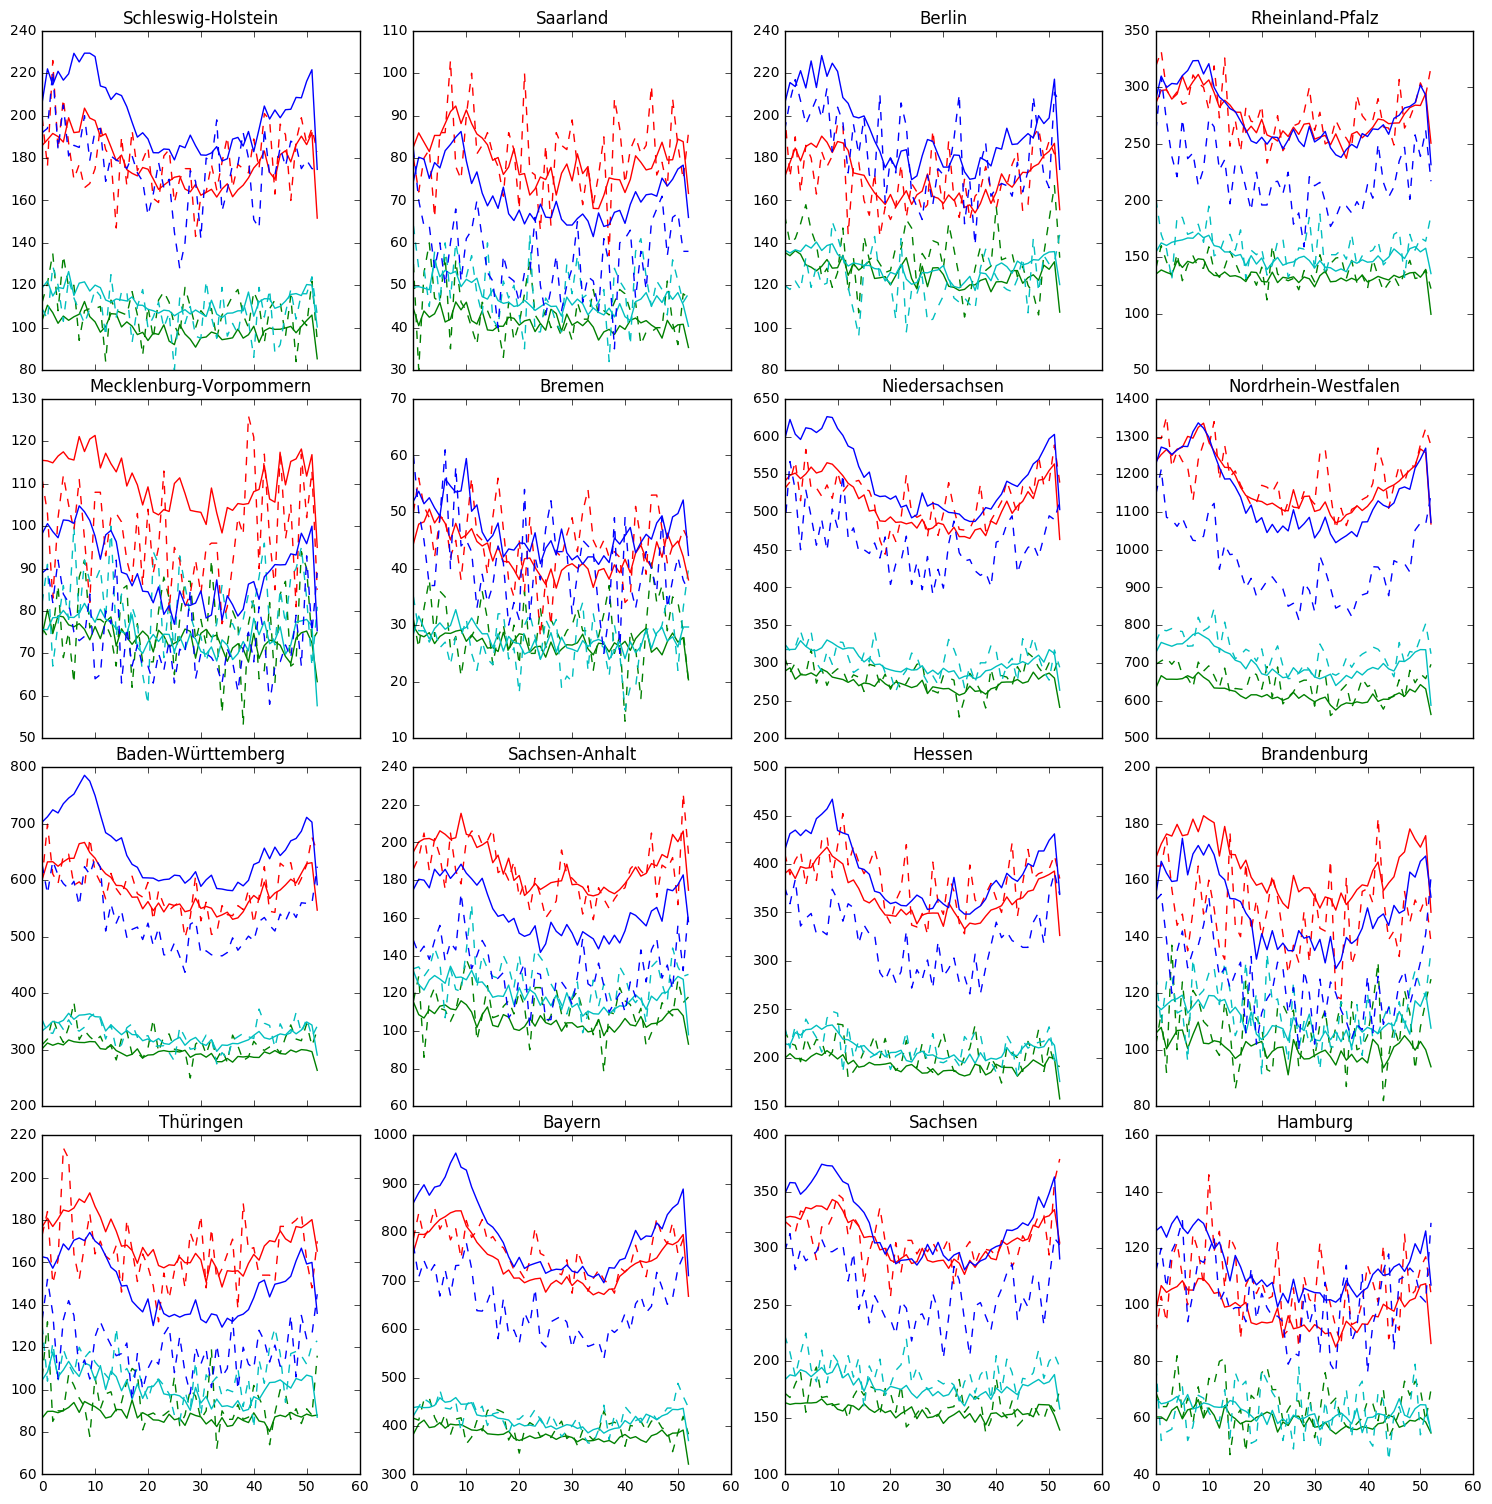

In [201]:
States = set(MortalityData['Bundesland'])
AgeGroups = set(MortalityData['Altersgruppe'])
AgeGroups = ['0-64', '65-74', '75-84', '85+']

#States = ['Hamburg', 'Bremen', 'Berlin']

Colors = ['g', 'c', 'b', 'r']

Fig, Axes = plt.subplots(4, 4, sharex=True, figsize=(15,15))
Fig.tight_layout()
StateIndex = 0
Weeks = range(53)
MeanPerWeek = np.zeros((16, 4, 53))
SumPerWeek = np.zeros((16, 4, 53))
MedianPerWeek = np.zeros((16, 4, 53))
for State in States:
    
    for Num, AgeGroup in enumerate(AgeGroups):
        
        FilteredCases = MortalityData[MortalityData['Bundesland']==State]
        FilteredCases = FilteredCases[FilteredCases['Altersgruppe']==AgeGroup] # only contains Cases for State and AgeGroup
        for i in range(1,54):
            MeanPerWeek[StateIndex, Num, i-1] = FilteredCases[FilteredCases['Sterbewoche']==i]['Todesfälle'].mean()
            SumPerWeek[StateIndex, Num, i-1] = FilteredCases[FilteredCases['Sterbewoche']==i]['Todesfälle'].sum()
            MedianPerWeek[StateIndex, Num, i-1] = FilteredCases[FilteredCases['Sterbewoche']==i]['Todesfälle'].median()
        
        Axes[StateIndex%4,StateIndex//4].plot(Weeks, MeanPerWeek[StateIndex, Num, :], Colors[Num])
        Linestyle = Colors[Num] + '--'
        Kurz = FilteredCases[FilteredCases.Sterbejahr==2004]['Todesfälle']
        Axes[StateIndex%4,StateIndex//4].plot(Weeks, Kurz, Linestyle)
        
        Axes[StateIndex%4, StateIndex//4].set_title(State)
        # plot numbers: oben-links, columns runter, dann nach rechts weiter
        
    StateIndex += 1
   
plt.show()

# Germany as a whole: How many people are dying at what age?

(16, 4, 53)
[ 2174511.  2406812.  4044991.  4154092.]


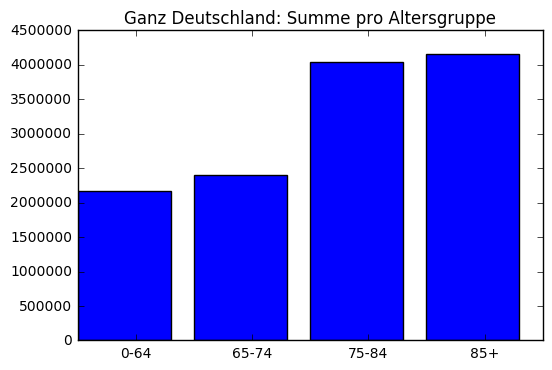

In [73]:
# wie viele Leute sterben pro Altersgruppe?
print(SumPerWeek.shape)
Summiert = np.sum(np.sum(SumPerWeek, axis=0), axis=1)
print(Summiert)
plt.figure()
plt.title("Ganz Deutschland: Summe pro Altersgruppe")
plt.bar([0,1,2,3],Summiert)
plt.xticks([0.5,1.5,2.5,3.5], ['0-64', '65-74', '75-84', '85+'])
plt.show()

# TODO: Diese Zahlen über die Jahre beschaut: 

['SH', 'MV', 'BW', 'TÜ', 'SA', 'BR', 'SA', 'BA', 'BE', 'NI', 'HE', 'S', 'RP', 'NW', 'BR', 'HH']


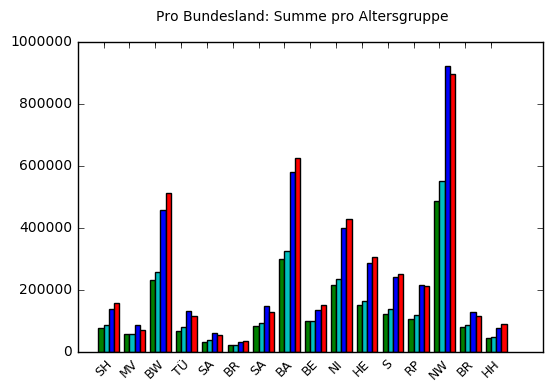

In [244]:
# und für jedes Bundesland aufgeschlüsselt:
LandSummiert = np.sum(SumPerWeek, axis=2)
x = np.arange(16)


width = 0.2
Fig = plt.figure()
Ax = Fig.add_subplot(111)#,figsize=(10,10))

plt.suptitle("Pro Bundesland: Summe pro Altersgruppe")

Ax.bar(x-width, LandSummiert[:,0], width, color='g')
Ax.bar(x, LandSummiert[:,1], width, color='c')
Ax.bar(x+width, LandSummiert[:,2], width, color='b')
Ax.bar(x+2*width, LandSummiert[:,3], width, color='r')

Ax.set_xlim([-1,17])
States = ['SH', 'MV', 'BW', 'TÜ','SA','BR', 'SA', 'BA', 'BE','NI','HE', 'S', 'RP', 'NW','BR','HH']
#States = set(MortalityData['Bundesland'])
print(States)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
Ax.set_xticks(x, States)
xtickNames = Ax.set_xticklabels(States)
plt.setp(xtickNames, rotation=45, fontsize=9)

plt.show()


# Zum Vergleich: Wie ist das in unseren Berlin-Daten?

5262


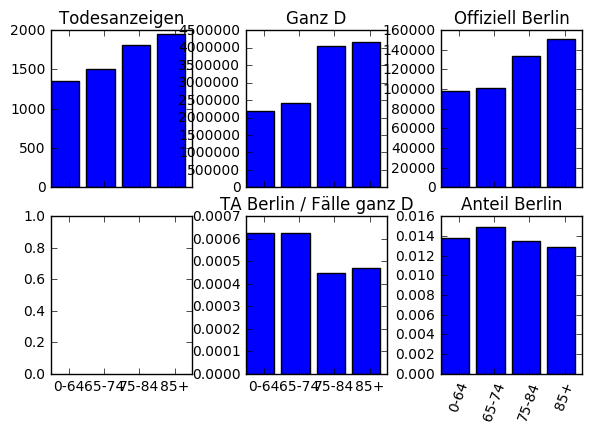

In [260]:
NotZero = CrawlerData[CrawlerData['Age'] > -1]
Over64 = NotZero[NotZero['Age'] > 64]
Over74 = Over65[Over65['Age'] > 74]
Over84 = Over74[Over74['Age'] > 84]
print(len(Over65))
Age0 = len(NotZero) - len(Over64)
Age1 = len(Over64) - len(Over74)
Age2 = len(Over74) - len(Over84)
Age3 = len(Over84)

Fig, Axes = plt.subplots(2, 3, sharex=True)
Fig.tight_layout()
Axes[0,0].set_title("Todesanzeigen")
Axes[0,0].bar([0,1,2,3],[Age0, Age1, Age2, Age3])

Axes[0,1].bar([0,1,2,3],Summiert)
Axes[0,1].set_title("Ganz D")

Anteil = [Age0, Age1, Age2, Age3] / Summiert
Axes[1,1].bar([0,1,2,3], Anteil)
Axes[1,1].set_title("TA Berlin / Fälle ganz D")

BerlinSum = np.sum(SumPerWeek[8,:,:], axis=1)
Axes[0,2].bar([0,1,2,3], BerlinSum)
Axes[0,2].set_title("Offiziell Berlin")

Axes[1,2].bar([0,1,2,3], [Age0, Age1, Age2, Age3]/BerlinSum)
Axes[1,2].set_title("Anteil Berlin")


plt.xticks([0.5,1.5,2.5,3.5], ['0-64', '65-74', '75-84', '85+'])
plt.xticks(rotation=70)



plt.show()


